In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

import sys
sys.path.append('../')
import src.evaluators.coco_evaluator as coco_evaluator
import src.evaluators.pascal_voc_evaluator as pascal_voc_evaluator
import src.utils.converter as converter
import src.utils.general_utils as general_utils
from src.bounding_box import BoundingBox
from src.utils.enumerators import (BBFormat, BBType, CoordinatesType,
                                   MethodAveragePrecision)

def plot_bb_per_classes(dict_bbs_per_class,
                        horizontally=True,
                        rotation=0,
                        show=False,
                        extra_title=''):
    plt.close()
    if horizontally:
        ypos = np.arange(len(dict_bbs_per_class.keys()))
        plt.barh(ypos, dict_bbs_per_class.values(), align='edge')
        plt.yticks(ypos, dict_bbs_per_class.keys(), rotation=rotation)
        plt.xlabel('amount of bounding boxes')
        plt.ylabel('classes')
    else:
        plt.bar(dict_bbs_per_class.keys(), dict_bbs_per_class.values())
        plt.xlabel('classes')
        plt.ylabel('amount of bounding boxes')
    plt.xticks(rotation=rotation)
    title = f'Distribution of bounding boxes per class {extra_title}'
    plt.title(title)
    if show:
        plt.tick_params(axis='x', labelsize=10) # Set the x-axis label size
        plt.show(block=True)
    return plt

In [2]:
#############################################################
# DEFINE GROUNDTRUTHS AND DETECTIONS
#############################################################
# # VOC-2007
# dir_imgs    = '../data/database/images'
# dir_gts     = '../data/database/gts/pascalvoc_format'
# dir_dets    = '../data/database/dets/abs_xyx2y2'
# dir_outputs = '../data/database/images_with_bbs'
# filepath_class_names = '../toyexample/voc.names'
# # toyexample-cat
dir_imgs    = '../toyexample/images'
dir_gts     = '../toyexample/gts_vocpascal_format'
dir_dets    = '../toyexample/dets_classname_abs_xyx2y2'
dir_outputs = '../toyexample/images_with_bbs'
filepath_class_names = None

# supervisely-kiwi-lemon
# dir_imgs    = '../toyexample/JPEGImages'
# dir_gts     = '../toyexample/Annotations'
# dir_dets    = '../toyexample/dets_classid_abs_xyx2y2_kiwi_lemons_noised'
# dir_outputs = '../toyexample/images_with_bbs'
# filepath_class_names = '../toyexample/kiwi_lemon.names'

# Get annotations (ground truth and detections)
gt_bbs  = converter.vocpascal2bb(dir_gts)
det_bbs = converter.text2bb(annotations_path = dir_dets, 
                            bb_type          = BBType.DETECTED, 
                            bb_format        = BBFormat.XYX2Y2,# XYX2Y2
                            type_coordinates = CoordinatesType.ABSOLUTE, 
                            img_dir          = dir_imgs,
                            file_obj_names   = filepath_class_names)

In [ ]:
# #############################################################
# # EVALUATE WITH COCO METRICS
# #############################################################
coco_res2 = coco_evaluator.get_coco_metrics(gt_bbs, det_bbs)
for class_ in coco_res2:
    print(class_, coco_res2[class_]['AP'])

{'per_class': {'cat': {'precision': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.88888889, 0.9       ,
       0.90909091, 0.91666667]), 'recall': array([0.08333333, 0.16666667, 0.25      , 0.33333333, 0.41666667,
       0.5       , 0.58333333, 0.66666667, 0.66666667, 0.75      ,
       0.83333333, 0.91666667]), 'AP': 0.8863636363636364, 'interpolated precision': [0, 0, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0], 'interpolated recall': [1.0, 0.9, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.6000000000000001, 0.5, 0.4, 0.30000000000000004, 0.2, 0.1, 0.0, 0], 'total positives': 12, 'total TP': 11.0, 'total FP': 1.0, 'method': <MethodAveragePrecision.ELEVEN_POINT_INTERPOLATION: 2>, 'iou': 0.5, 'table':           image confidence  TP  FP  acc TP  acc FP  precision    recall
0   2008_006599     99.00%   1   0     1.0     0.0   1.000000  0.083333

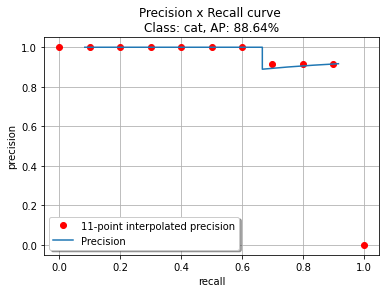

{'per_class': {'cat': {'precision': array([1.        , 0.5       , 0.66666667, 0.5       , 0.6       ,
       0.66666667, 0.71428571, 0.75      , 0.66666667, 0.7       ,
       0.63636364, 0.66666667]), 'recall': array([0.08333333, 0.08333333, 0.16666667, 0.16666667, 0.25      ,
       0.33333333, 0.41666667, 0.5       , 0.5       , 0.58333333,
       0.58333333, 0.66666667]), 'AP': 0.4924242424242424, 'interpolated precision': [0, 0, 0, 0, 0, 0.6666666666666666, 0.6666666666666666, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 1.0, 0], 'interpolated recall': [1.0, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.6000000000000001, 0.5, 0.5, 0.4, 0.30000000000000004, 0.2, 0.1, 0.0, 0.0, 0], 'total positives': 12, 'total TP': 8.0, 'total FP': 4.0, 'method': <MethodAveragePrecision.ELEVEN_POINT_INTERPOLATION: 2>, 'iou': 0.75, 'table':           image confidence  TP  FP  acc TP  acc FP  precision    recall
0   2008_006599     99.00%   1   0     1.0     0.0   1.000000  0.083333
1   2010_004175    

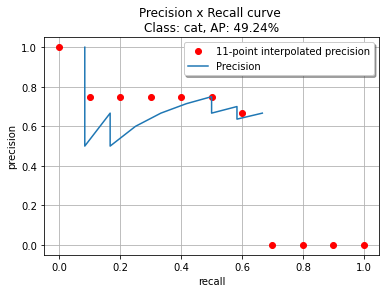

In [3]:
#############################################################
# EVALUATE WITH VOC PASCAL METRICS
#############################################################
ious = [0.5, 0.75] # 
voc_res = {}
for iou in ious:
    dict_res = pascal_voc_evaluator.get_pascalvoc_metrics(gt_bbs, det_bbs, iou, generate_table=True, 
                                                          method=MethodAveragePrecision.ELEVEN_POINT_INTERPOLATION)
    print(dict_res)
    voc_res = dict_res['per_class']
    pascal_voc_evaluator.plot_precision_recall_curves(voc_res, showInterpolatedPrecision=True, showAP=True)